In [1]:
import os
import requests
from builtins import bytes
from IPython.display import display
from PIL import Image
from frontend import encode_PIL_to_base64, decode_base64_to_PIL

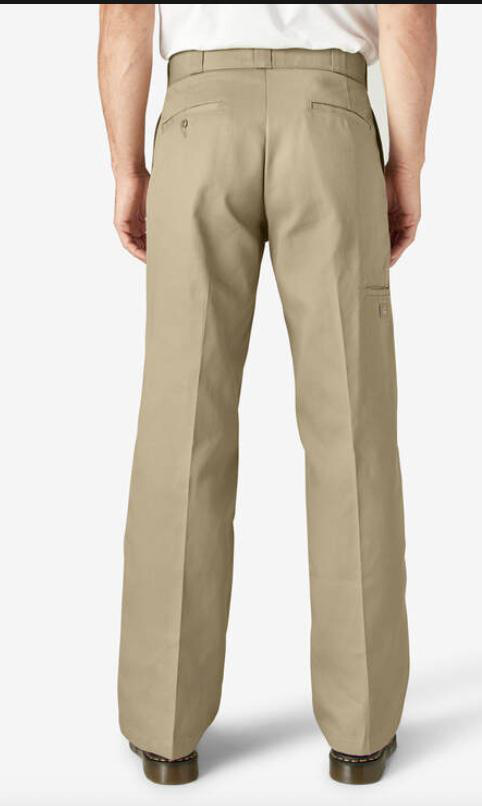

In [2]:
test_image_001 = Image.open("test.jpg")
b64_image_string = encode_PIL_to_base64(test_image_001)
display(decode_base64_to_PIL(b64_image_string))

# Analysis Clothing attributes
![image info](figures/attribute_retrieve_pipeline.png)

Step of analyzes-clothing services :
1. Send image with base64 encoded string to backend
2. Embedding image and prompt and call ChatGPT4 for analyzing image.
3. Retrieve clothing attributes.
4. Show clothing attribute to Jupyter Notebook

Finally, we get dictionary contains clothing color and size from clothing_attributes services.

In [3]:
#retrieve clothes attributes
#local host : 0.0.0.0:9999 and we use post-function called cloth_attributes_retrive to get attribute of cloth image
params = {"base64_img_str": str(b64_image_string, encoding='utf-8')}
cloth_attribute_retrieve_url = "http://0.0.0.0:9999/cloth_attribute_retrieve"
cloth_attribute_response = requests.post(cloth_attribute_retrieve_url, params = params)
print(cloth_attribute_response.json())

<Response [200]>
{'cloth_color': 'light', 'cloth_size': 'loose', 'state': 200, 'message': 'Successfully retrive cloth attribute from image.'}


# Analysis Clothing attributes
![image info](figures/recommend_pipline.png)

Step of recommend services :
1. Send image with base64 encoded string to backend
2. Embedding image and prompt and call ChatGPT4 for analyzing image.
3. Retrieve clothing attributes and searching similar one in local database.
4. Show recommended clothing image to Jupyter Notebook

We get recommended clothing from local database based on clothing color and size.

<Response [200]>


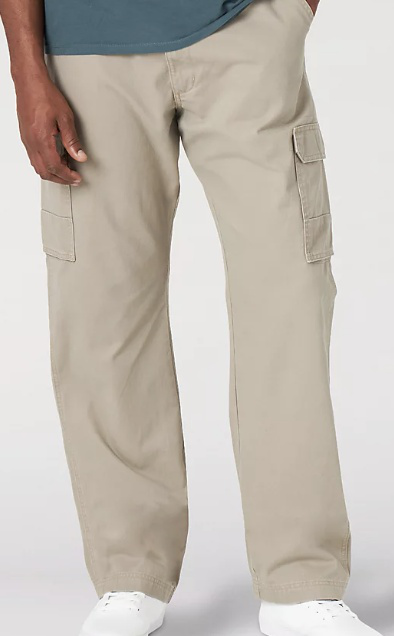

In [4]:
#retrieve clothes attributes
#local host : 0.0.0.0:9999 and we use post-function called cloth_attributes_retrive to get attribute of cloth image
params = {"base64_img_str": str(b64_image_string, encoding='utf-8')}
find_similary_cloth_url = "http://0.0.0.0:9999/find_in_db"
find_similary_cloth_response = requests.post(find_similary_cloth_url, params = params)
find_similary_cloth_response = find_similary_cloth_response.json()

similar_cloth, cloth_popularity = find_similary_cloth_response['similar_cloth'], find_similary_cloth_response['cloth_popularity']
similar_cloth = decode_base64_to_PIL(bytes(similar_cloth, 'utf-8'))
display(similar_cloth)